# EXPLORATORY DATA ANALYSIS (EDA) - PROJECT

In [5]:
import pandas as pd
import numpy as np
df=pd.read_csv("suicide-rates.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [98]:

import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Description

###  Suicide Rates Overview 1985 to 2016 Dataset

Suicide Rates Overview 1985 to 2016 dataset (Available on Kaggle). 

This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

Our aim is to make general analysis of suicide rates and we will explain these rates in detail.

Dataset Feature List - 

. country <br>
. year<br>
. sex<br>
. age<br>
. suicides_no<br>
. population<br>
. suicides/100k pop<br>
. country-year<br>
. HDI for year<br>
. gdp_for_year<br>
. gdp_per_capita<br>
. generation<br>

# Problem

**Given the data, after removing null values, analyse and perform the EDA.**

1. How many males and females are there in dataset? Also find out how many males and females are there based on minimum and maximum gdp per capita?


2. How many males and females are there in the data categorise by age parameter?


3. Count the number of people based on Age values and plot. *(Hint: Use groupby on age)*


4. How many generations are there in the data? Also based on sex parameter?


5. plot a **five number summary** for three parameters - population, gdp per capita and year.


6. Plot a **line graph** for the statistics of data. *(Hint: plot on data.describe() where kind = area)*


7. Draw two graphs on same canvas for generation parameter. First graph should be **Pie Chart** and Second graph should be **Count plot.**


8. Plot a **joint plot** between - <br>
   i) year on x-axis and suicides\100 k pop on y-axis (scatter plot). <br>
   ii)year on x-axis and gdp per capita on y-axis (reg plot) .<br>
   iii) year on x-axis and gdp per capita on y-axis (kde plot).<br>
   iv) year on x-axis and gdp per capita on y-axis (hex plot).<br>


9. Draw **FacetGrid** based on year between gdp per capita and population. *(Hint: use map with scatter plot)*


10. Visualise the graph between year and suicides\100 k pop using **stripplot**.


11. Plot graph between each unique values of generation parameter. Also use **violinplot** between generation and population.


12. Visualize the correlation between data.

13. Find mean, median and skewness of population and give your interpretation.

# Solution

# 1.

In [11]:
df1=df[df['sex']=='female'].count()
df1['sex']

13910

In [12]:
df1=df[df['sex']=='male'].count()
df1['sex']

13910

In [17]:
df['gdp_per_capita ($)'].min()

251

In [37]:
df1=df[df['gdp_per_capita ($)']==251]
df2=df1[df1['sex']=='female'].count()
df2['sex']

6

In [27]:
df1=df[df['gdp_per_capita ($)']==251]
df2=df1[df1['sex']=='male'].count()
df2['sex']

6

In [28]:
df['gdp_per_capita ($)'].max()

126352

In [29]:
df1=df[df['gdp_per_capita ($)']==126352]
df2=df1[df1['sex']=='female'].count()
df2['sex']

6

In [38]:
df1=df[df['gdp_per_capita ($)']==126352]
df2=df1[df1['sex']=='male'].count()
df2['sex']

6

# 2.

In [50]:
df1=df[df['sex']=='female']
df1['age'].value_counts().sort_index()

15-24 years    2321
25-34 years    2321
35-54 years    2321
5-14 years     2305
55-74 years    2321
75+ years      2321
Name: age, dtype: int64

In [51]:
df1=df[df['sex']=='male']
df1['age'].value_counts().sort_index()

15-24 years    2321
25-34 years    2321
35-54 years    2321
5-14 years     2305
55-74 years    2321
75+ years      2321
Name: age, dtype: int64

# 3.

In [52]:
df1=df['age'].value_counts().sort_index()

15-24 years    4642
25-34 years    4642
35-54 years    4642
5-14 years     4610
55-74 years    4642
75+ years      4642
Name: age, dtype: int64

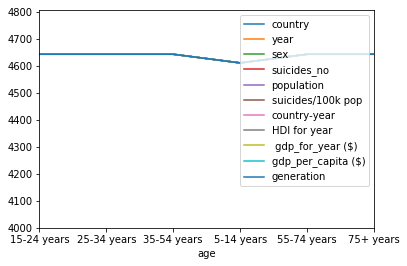

In [61]:
df1=df.groupby("age").count()
df1.plot(ylim=4000)

# 4.

In [65]:
df['generation'].count()

27820

In [79]:
df1=df[df['sex']=='male']['generation'].unique()
df1

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [80]:
df1=df[df['sex']=='female']['generation'].unique()
df1

array(['Generation X', 'G.I. Generation', 'Silent', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [81]:
df[df['sex']=='male']['generation'].value_counts()

Generation X       3204
Silent             3182
Millenials         2922
Boomers            2495
G.I. Generation    1372
Generation Z        735
Name: generation, dtype: int64

In [82]:
df[df['sex']=='female']['generation'].value_counts()

Generation X       3204
Silent             3182
Millenials         2922
Boomers            2495
G.I. Generation    1372
Generation Z        735
Name: generation, dtype: int64

# 5.

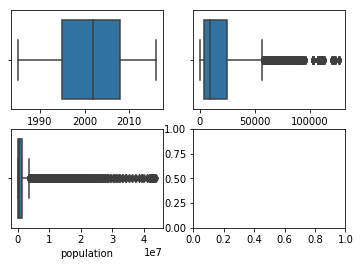

In [100]:
'''
df1=df.loc[:, ['generation','gdp_per_capita ($)','year']].head()
df2=df.describe()
df2.boxplot()
'''
fig,ax = plt.subplots(2,2)
sns.boxplot(x = df['year'],ax = ax[0,0])
sns.boxplot(x = df['gdp_per_capita ($)'],ax = ax[0,1])
sns.boxplot(x = df['population'],ax = ax[1,0]);

# 6.

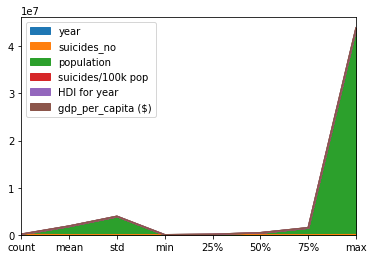

In [101]:
df.describe().plot(kind = 'area')

# 7.

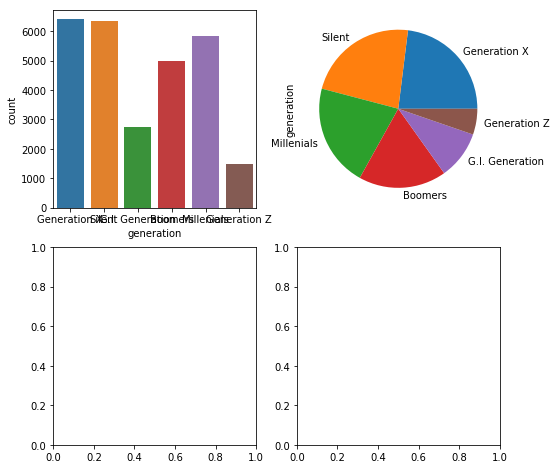

In [108]:


fig,ax = plt.subplots(2,2,figsize = (8,8))
sns.countplot(df['generation'],ax = ax[0,0])
df['generation'].value_counts().plot.pie(ax = ax[0,1]);

# 8.

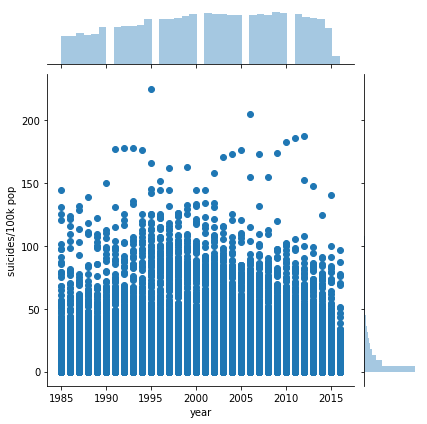

In [109]:
sns.jointplot(x = df['year'],y = df['suicides/100k pop']);

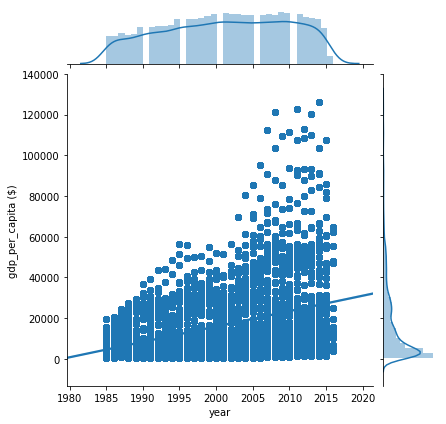

In [110]:
sns.jointplot(x = df['year'],y = df['gdp_per_capita ($)'],kind = 'reg');

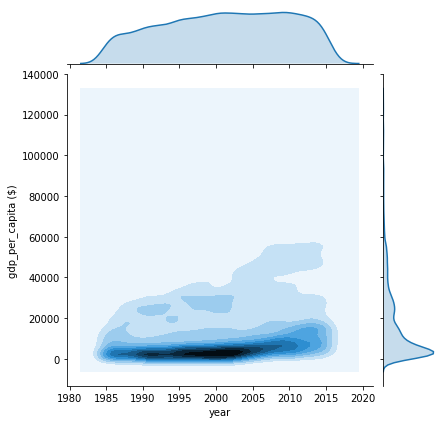

In [111]:
sns.jointplot(x = df['year'],y = df['gdp_per_capita ($)'],kind = 'kde');

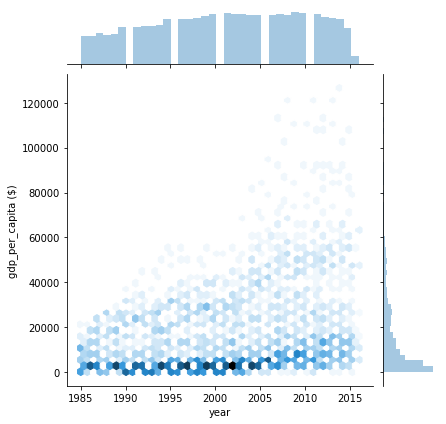

In [112]:
sns.jointplot(x = df['year'],y = df['gdp_per_capita ($)'],kind = 'hex');

# 9.

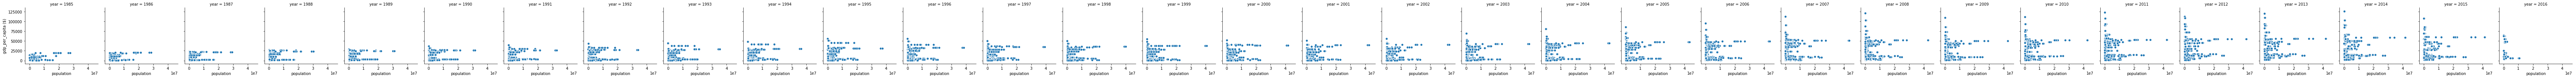

In [114]:
g = sns.FacetGrid(df, col='year')
g.map(sns.scatterplot,'population','gdp_per_capita ($)');

# 10.

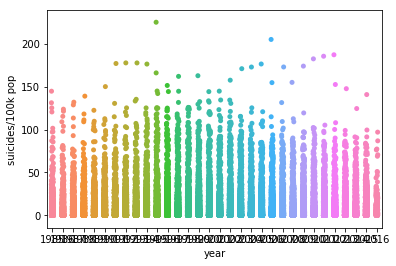

In [113]:
sns.stripplot(x = 'year',y = 'suicides/100k pop',data = df);

# 11.

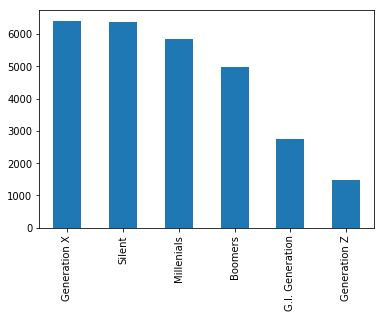

In [115]:
df['generation'].value_counts().plot(kind = 'bar');

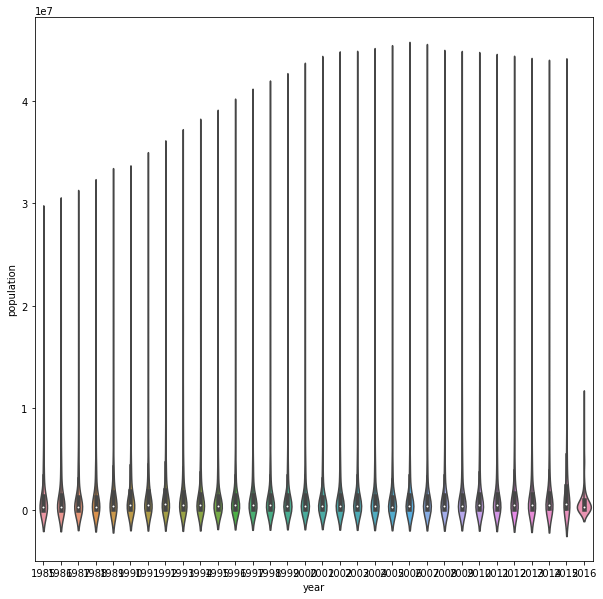

In [116]:
plt.figure(figsize = (10,10))
sns.violinplot(x = df['year'],y = df['population']);

# 12.

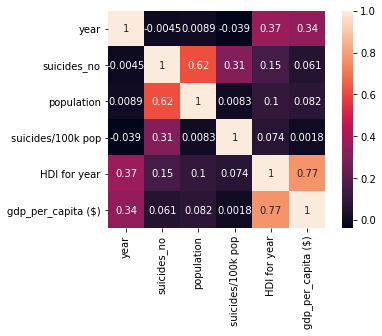

In [117]:
sns.heatmap(df.corr(),square = True,annot= True)

In [122]:
df['population'].mean()

1844793.6173975556

In [123]:
df['population'].median()

430150.0

In [124]:
df['population'].std()

3911779.4417563686

In [125]:
skew = (3 * (mean - median))/std
skew

1.0849105670147812